<a href="https://colab.research.google.com/github/alikrc/urban-sounds-classification/blob/main/Urban_Sounds_Classification_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from cv2 import imshow
import tensorflow as tf
import cv2 
import glob
# from PIL import Image
import pandas as pd
import numpy as np
import math
import sklearn
import sklearn.model_selection as ms
from google.colab.patches import cv2_imshow



In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Read images and label them
# Make a grayscale tarnsformation when reading
def read_images_with_grayscale_transform():
    # Create lists for our data and labels
    data = []
    label = []
    # Open every folder from 0 to 9. Read and hold them into a list. (Also labels)
    for i in range(10):
        for filename in glob.glob('/content/drive/MyDrive/spectrograms/'+ str(i) +'/*.png'):
            im=cv2.imread(filename, 0) # 0 for grayscale transformation
            data.append(im)
            label.append(i)
    return data, label

In [13]:
def image_resize_and_normalization(data, new_size=64):
    for i, img in enumerate(data):
        # Resize the image
        img = cv2.resize(img, (new_size,new_size))
        # Normalize the image 
        img = cv2.normalize(img, None, alpha=0,beta=255, norm_type=cv2.NORM_MINMAX)
        data[i] = img
    return data

In [14]:
def train_val_test_set_creator(data, label, val_set_ratio=0.2, test_set_ratio=0.2):
    # Train and test split
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, label, test_size= test_set_ratio, random_state=0)
    real_val_set_ratio = val_set_ratio / (1-test_set_ratio) # To compute val_set_ratio correctly after the first split
    # Train and validation split
    x_train, x_val, y_train, y_val =  sklearn.model_selection.train_test_split(x_train, y_train, test_size= real_val_set_ratio, random_state=0)
    
    return x_train, x_test, x_val, y_train, y_test, y_val


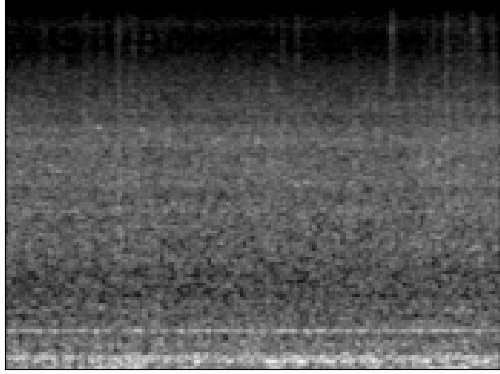

In [15]:
data, label = read_images_with_grayscale_transform()
cv2_imshow(data[0])

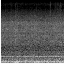

In [16]:
input_shape = 64
data_ = image_resize_and_normalization(data,input_shape)
cv2_imshow(data_[0])

In [17]:
x_train, x_test, x_val, y_train, y_test, y_val = train_val_test_set_creator(data, label, test_set_ratio=0.2,val_set_ratio=0.2)

In [18]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)


base_path = '/content/drive/MyDrive/soundsClassification/'

with open(base_path+'x_train.npy', 'w') as f:
  np.save(base_path+'x_train.npy', x_train)
with open(base_path+'y_train.npy', 'w') as f:
  np.save(base_path+'y_train.npy', y_train)
with open(base_path+'x_val.npy', 'w') as f:
  np.save(base_path+'x_val.npy', x_val)
with open(base_path+'y_val.npy', 'w') as f:
  np.save(base_path+'y_val.npy', y_val)
with open(base_path+'x_test.npy', 'w') as f:
  np.save(base_path+'x_test.npy', x_test)
with open(base_path+'y_test.npy', 'w') as f:
  np.save(base_path+'y_test.npy', y_test)